# 1. Plotting for Exploratory data analysis (EDA)

# Exploratory Data Analysis
It is a way to understand the as-is scenario of the data present. The main characteristics of the data can be chalked out using EDA. It gives a more generalized idea into the dataset, something that is beyond formal model building/testing.

Exploring a provided dataset with different EDA methodologies not only helps to get better insights but gives a clear comparison among different parameters also. The primary objective of EDA is to gain such confidence over data, that a suitable machine-learning algorithm can be deployed. Another important motive is to perform feature selection to enable engineering on them.

#  Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar


# Haberman's Survival Data Set

toy Dataset Habern's Survival Data set : https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set?resource=download

# Description 🡪 
The dataset contains cases ranging from 1958–1970 from a study conducted at University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod habern's.csv from https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set?resource=download'''
#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [2]:
# (Q) how many data-points and features?
print (haberman.shape)


(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (haberman.columns)
haberman.head()

Index(['age', 'year', 'nodes', 'status'], dtype='object')


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (Binary)
* 1 = the patient survived 5 years or longer 
* 2 = the patient died within 5 year

In [4]:
haberman['status']=haberman['status'].map({2:"NO",1:'YES'})

In [5]:
#Information about the dataset 
print(haberman.info())
#brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
None


* No missing values present
* All columns are of integer data type
* The dependent variable i.e. Status is an integer. It needs to be converted to a categorical data type.
* 1 🡪 mapped as Yes , 2🡪 mapped as No

In [6]:
haberman.describe()
#describes the dataset


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


* Count : Total number of values present in respective columns.
* Mean: Mean of all the values present in the respective columns.
* Std: standard Deviation of the values present in the respective columns.
* Min: The minimum value in the column.
* 25%: Gives the 25th percentile value.
* 50%: Gives the 50th percentile value.
* 75%: Gives the 75th percentile value.
* Max: The maximum value in the column.

In [7]:
#(Q) How many data points for each class are present? 
#(or) How many  for each species are present?

haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#haberman is not balanced dataset as the number of data points for every class is not same.

status
YES    225
NO      81
Name: count, dtype: int64

In [8]:
status_yes = haberman[haberman['status']=="YES"]
status_yes.describe()
#status_yes dataframe stores all the records where status is YES

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [9]:
status_no =haberman[haberman["status"]=="NO"]
status_no.describe()
#status_yes dataframe stores all the records where status is NO

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# 1-d Scatter Plot
From the given data set we select the most prominent feature, the axillary lymph nodes, to plot the 1-d scatter plot below:

In [10]:
alive = haberman.loc[haberman['status'] == 'YES']
died = haberman.loc[haberman['status'] == 'NO']

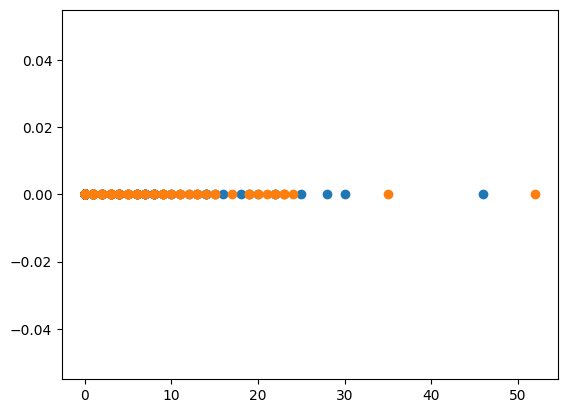

In [11]:
plt.plot(alive["nodes"], np.zeros_like(alive['nodes']), 'o')
plt.plot(died["nodes"], np.zeros_like(died['nodes']), 'o') 

plt.show()

# Observations
* The two classes overlap highly.
* We must plot differently.


# 2-D Scatter Plot

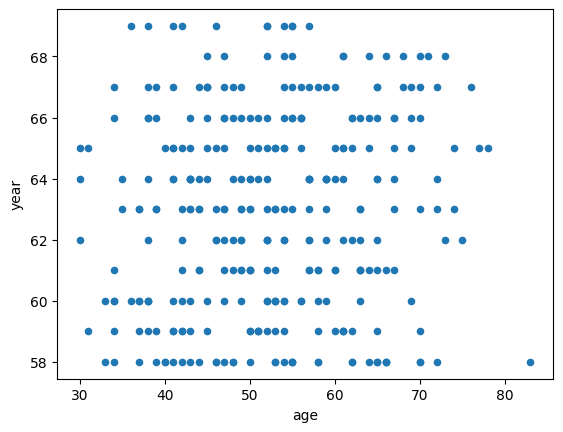

In [12]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='year') 
plt.show()


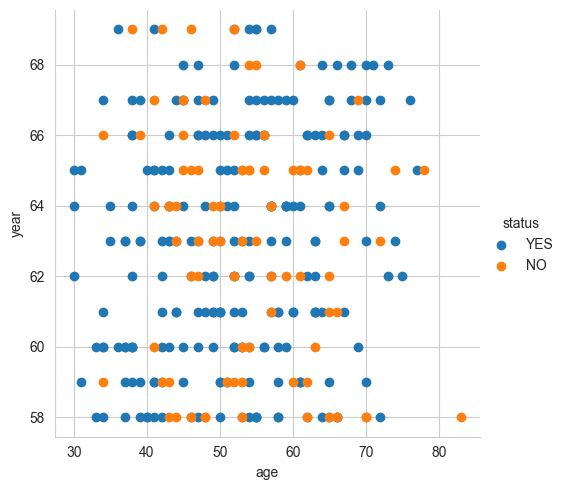

In [13]:
# Between 'age' & 'year'

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.show()

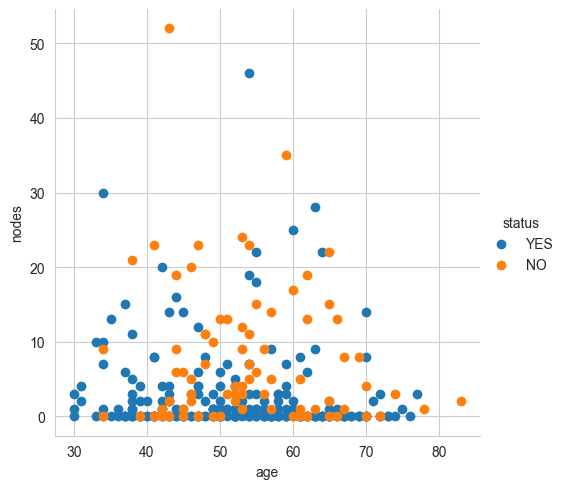

In [14]:
# Between 'age' & 'nodes'

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()


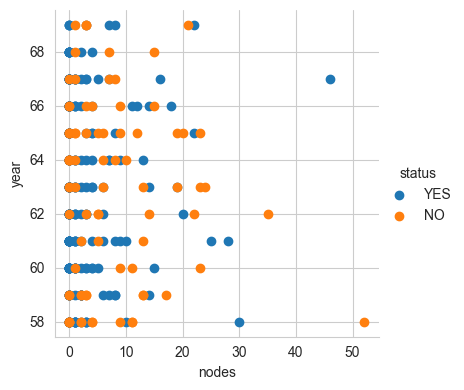

In [15]:
# Between 'year' & 'nodes'

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend()
plt.show()


# Observations
* We cannot classify the two classes as they both are quite jumbled up.
* We should come up with other plots between the various features in the set.

# Pair Plots
Many of the times in Data Science/Machine Learning we have to deal with n-dimensional(n>3) problems, dimensions are the features in the given problem. Since we humans cannot imagine dimensions more than 3-d, we try to gain insights from n-d problems by plotting Pair-Plots of the features. All combinations of feature pairs are plotted and we gain insights into the data.

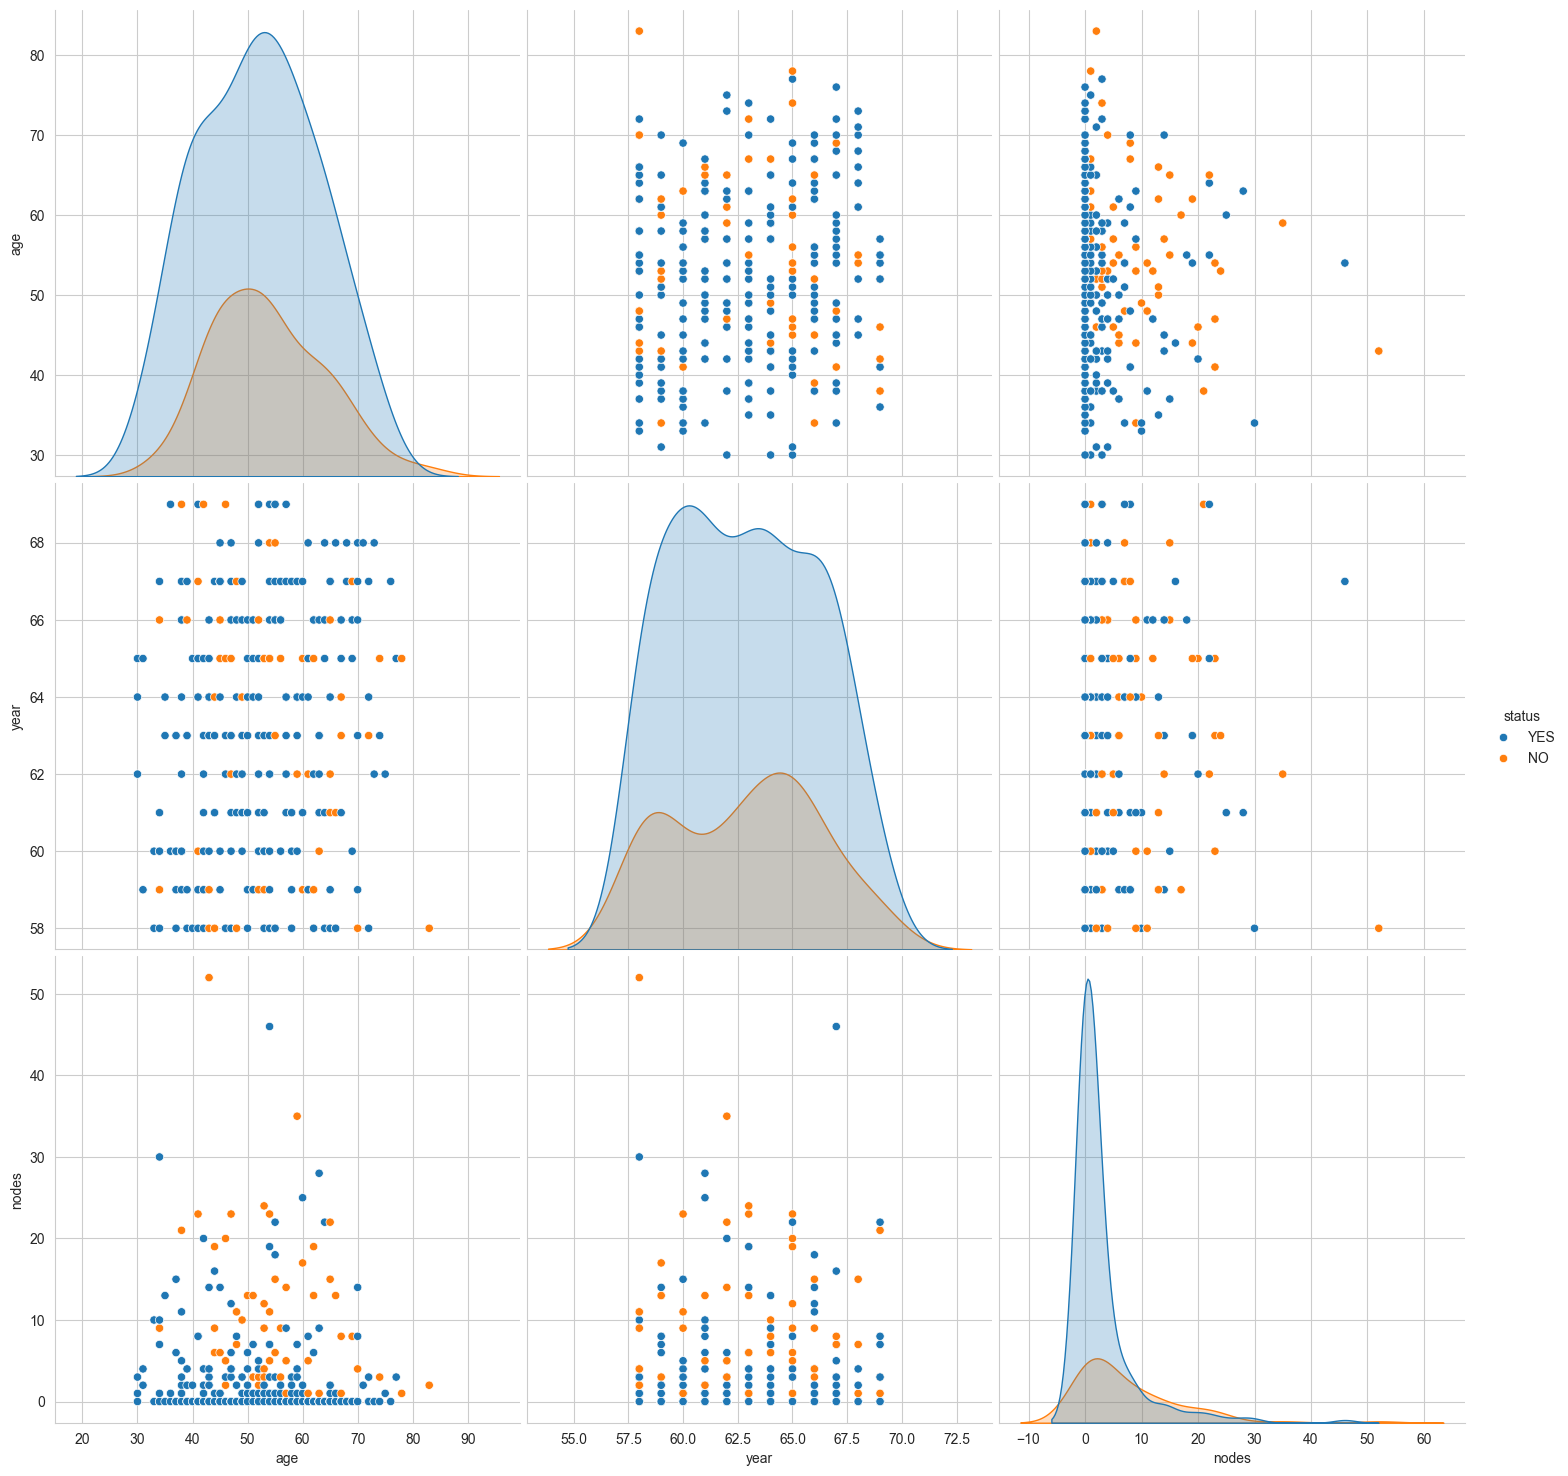

In [16]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height=5)
plt.show()


# Observations
* We cannot classify the two classes as they both are quite jumbled up.
* We should come up with other plots between the various features in the set.

# Histograms and PDF(s)
* A histogram can provide us with the count(on the y-axis) of each of the species(on the x-axis) in the above 1-d scatter plot.
* A pdf is a smooth histogram that provides us with the probable density of a given class at a certain point on the x-axis.
* Using only one feature, a histogram and a pdf can be used very easily to create a model for a problem .

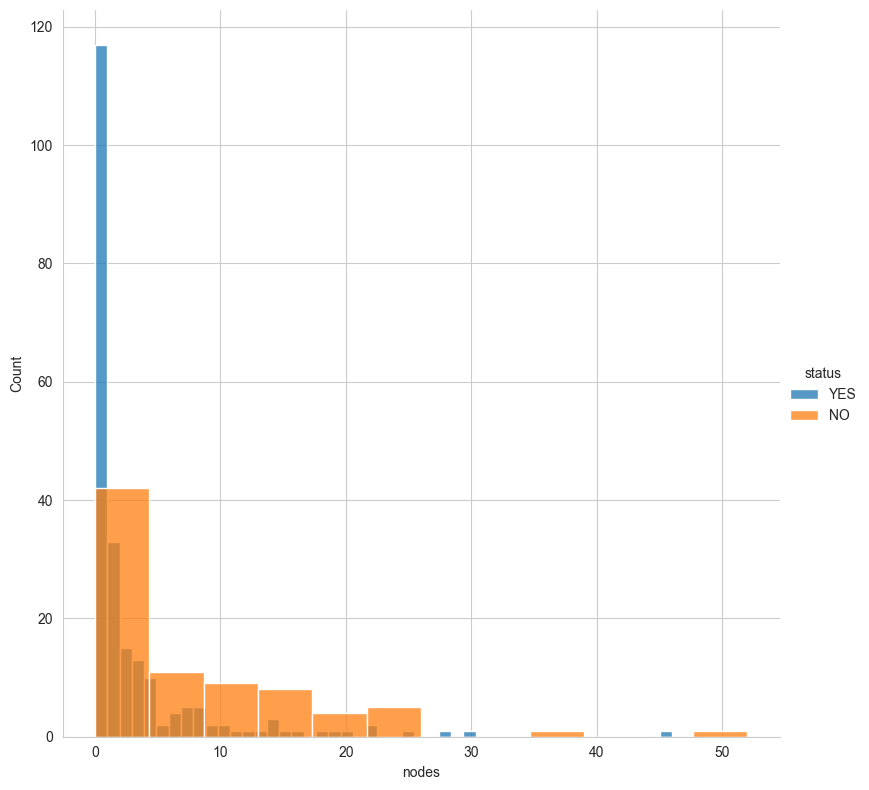

In [17]:
# Of 'nodes'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.histplot, "nodes") \
   .add_legend()
plt.show()

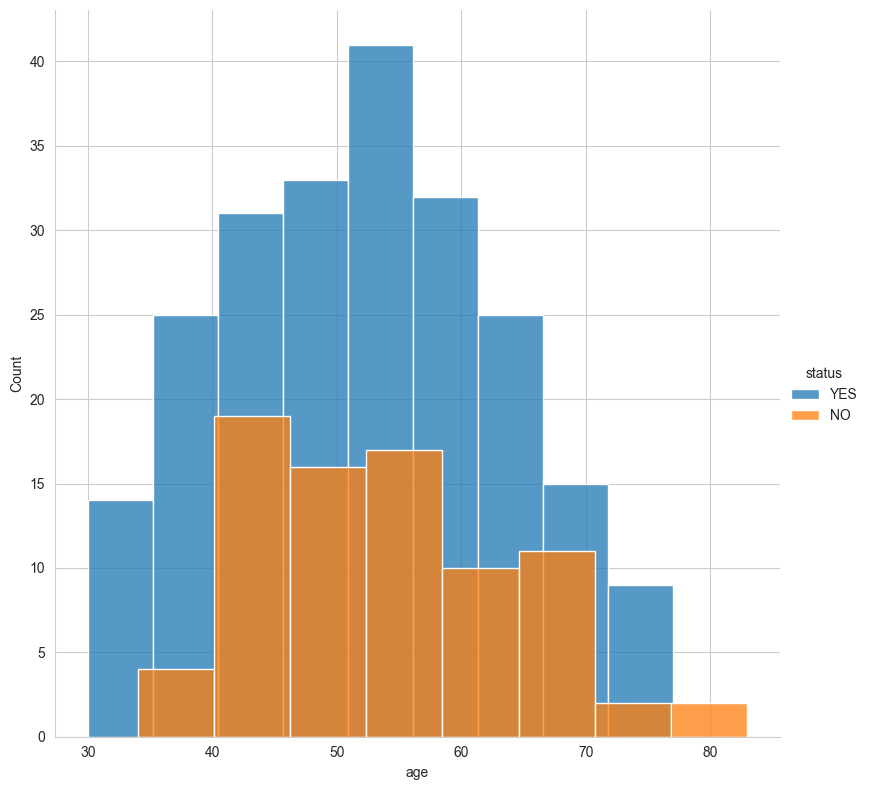

In [18]:
# Of 'age'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.histplot, "age") \
   .add_legend()
plt.show()

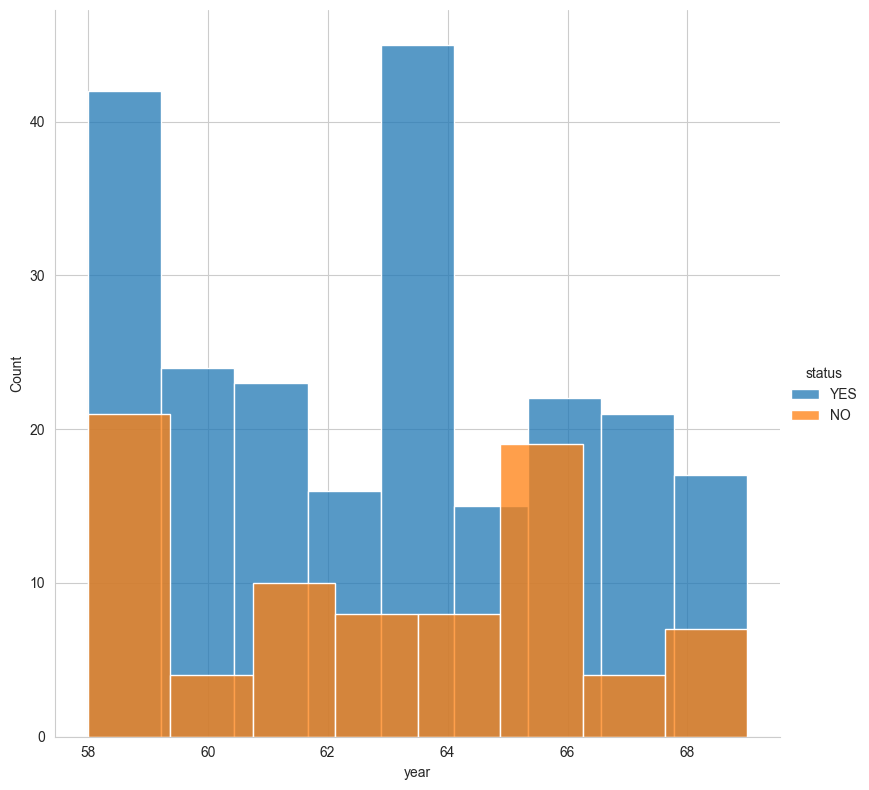

In [19]:
# Of 'age'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.histplot, "year") \
   .add_legend()
plt.show()

# Observations
* We cannot classify the two classes as they both are highly overlapping.
* We should come up with other plots between the various features in the set.

# Cumulative Density Function(CDF)
A Cumulative Density Function(CDF) can provide us with what percentage of a class have a specific feature (say, axillary lymph nodes). We use every feature of the classes, in the given probelm, to plot a CDF:

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


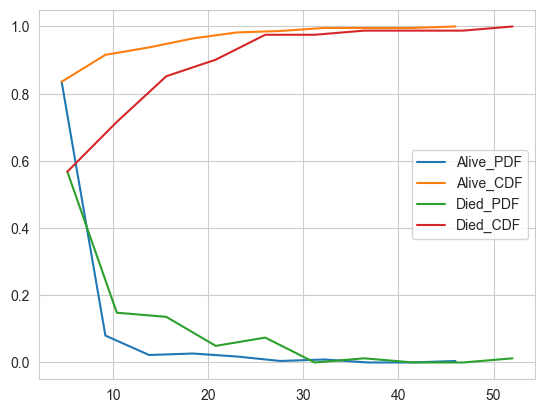

In [20]:
# CDF of 'nodes'

counts, bin_edges = np.histogram(alive['nodes'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


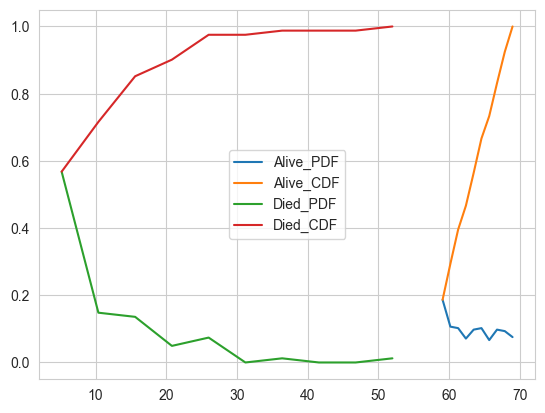

In [21]:
# CDF of 'YEAR'

counts, bin_edges = np.histogram(alive['year'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


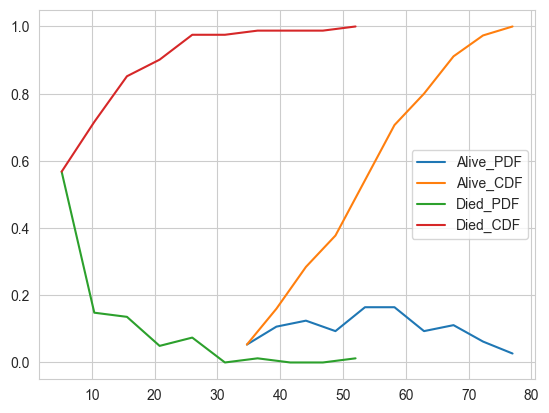

In [22]:
# CDF of 'age'

counts, bin_edges = np.histogram(alive['age'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Observations
* We cannot classify the two classes as they both are quite jumbled up.
* We should come up with other plots between the various features in the set.

# Box Plots and Whiskers
* Box Plots use the percentiles(IQR) of a specific feature to draw a plot.
* Whiskers show the maximum and the mininmum values of a specific feature of a problem.
* In Seaborn library, the implementation of whiskers may be slightly different in that they might show whiskers as 1.5 x IQR.
* The width of a Box Plot conveys no information. It is just to equally divide the space between the different classes to be plotted.
* For Haberman data set, box plots between the two classes are plotted, using every feature, below:

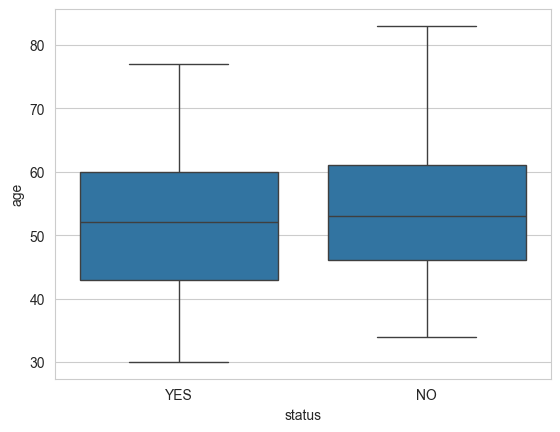

In [23]:
# Of age
sns.boxplot(x = 'status', y = 'age', data = haberman)
plt.show()

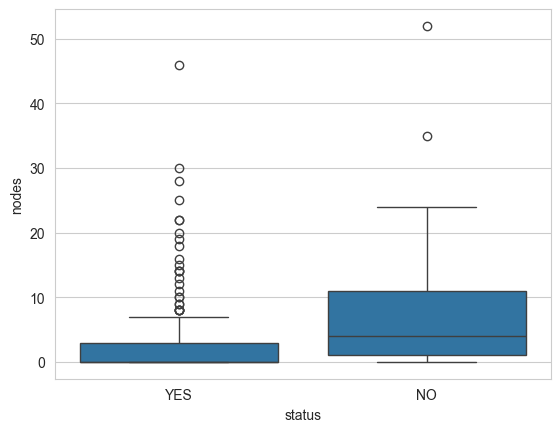

In [24]:
# Of nodes
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.show()

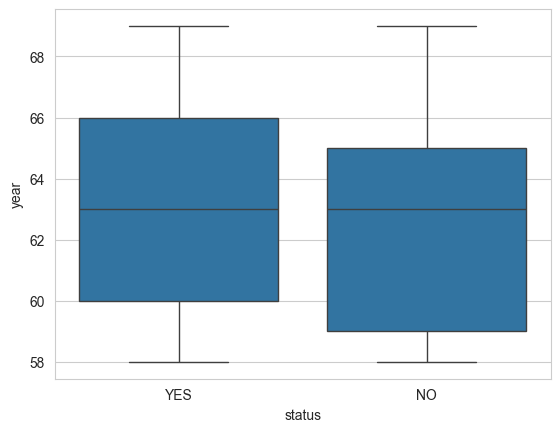

In [25]:
# Of year
sns.boxplot(x = 'status', y = 'year', data = haberman)
plt.show()

# Violin Plots
* Violin Plots combine the Box Plots and the PDF Plots.
* For Haberman data set, violin plots between the two classes are plotted, using every feature, below:

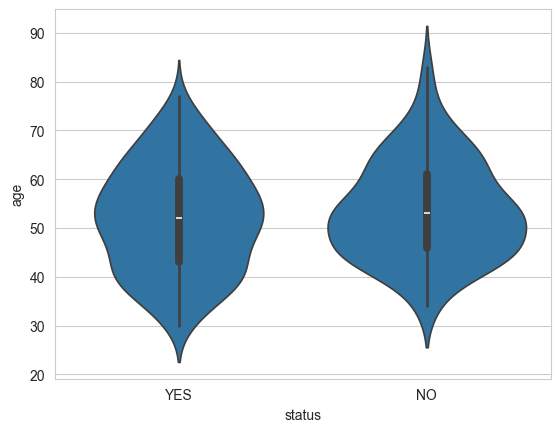

In [26]:
# Of age
sns.violinplot(x = 'status', y = 'age', data = haberman)
plt.show()

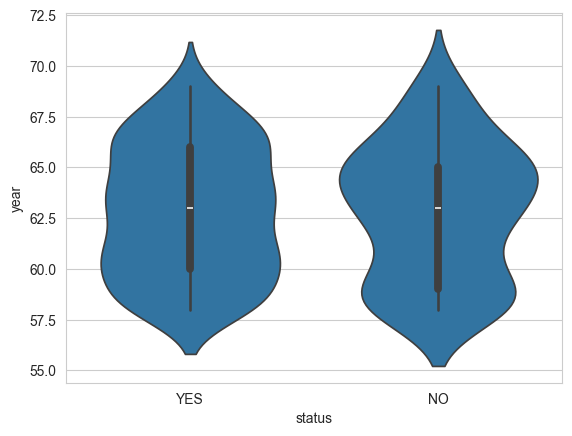

In [27]:
# Of year
sns.violinplot(x = 'status', y = 'year', data = haberman)
plt.show()

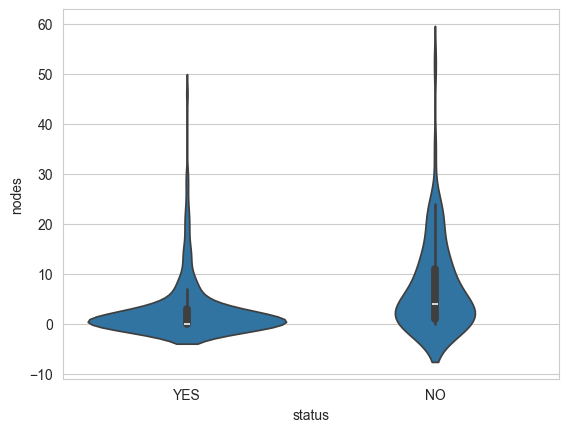

In [28]:
# Of nodes
sns.violinplot(x = 'status', y = 'nodes', data = haberman)
plt.show()

# Observations
* We cannot classify the two classes as they both are quite jumbled up.
* We should come up with other plots between the various features in the set.

# Multivariate Analysis
Contour plot :- Used to represent 3-D surface by plotting constant Z-slices on a 2-D format.

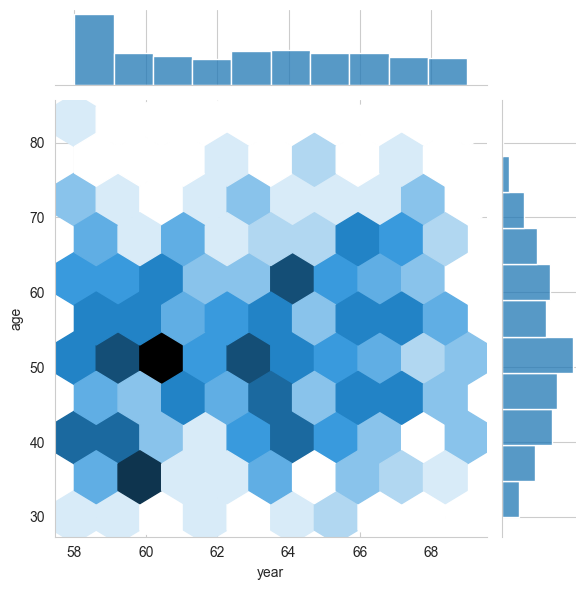

In [29]:
sns.jointplot(x = 'year', y = 'age', data = haberman, kind = "hex")
plt.show()

# Statistics of the data set

In [30]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Conclusion
* Patient’s age & year of operation is not a defining factor for survival. However, patients with age less than 35 are likely to survive.
* Survival chances are more if less axillary nodes are present. Zero axillary nodes, however, do not guarantee survival.
* Class imbalance leads to such conclusions. If the data remains balanced, better conclusions can be reached at.